[source:oracle](https://oracleselixir.com/stats/teams/byTournament)

[source:wiki](https://lol.fandom.com/wiki/League_of_Legends_Esports_Wiki)

### Original data

In [1]:
import pandas as pd

yearStatForWorldsTeam = pd.read_excel('Team1vsTeam2_2019-2023 .xlsx') #source: https://oracleselixir.com/stats/teams/byTournament

yearStatForWorldsTeam

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


# Feature Selection

In [2]:
df=yearStatForWorldsTeam
df.describe()

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.005476,0.011848,0.002174,0.021630,0.001641,0.260598,0.409511,0.001929,0.001168,0.002255,0.002717,0.005272,0.003505,0.011114,0.002935,0.000033,0.001590,0.007527,-0.005516,0.519022
std,0.112255,0.268764,0.158620,0.527456,0.039215,7.766588,10.058686,0.103725,0.123330,0.128150,0.128543,0.123945,0.076500,0.349521,0.100566,0.006580,0.023699,0.359765,0.212638,0.500318
min,-0.293907,-0.940000,-0.430000,-1.640000,-0.125000,-18.500000,-31.900000,-0.320000,-0.350000,-0.450000,-0.340000,-0.350000,-0.200000,-1.000000,-0.260000,-0.020000,-0.058000,-1.110000,-0.570000,0.000000
25%,-0.078084,-0.170000,-0.110000,-0.330000,-0.024250,-5.825000,-6.800000,-0.070000,-0.080000,-0.080000,-0.090000,-0.090000,-0.050000,-0.140000,-0.080000,-0.004000,-0.016000,-0.240000,-0.150000,0.000000
50%,0.007489,0.020000,-0.010000,0.065000,0.002500,0.300000,0.400000,0.000000,-0.010000,0.000000,0.000000,0.010000,0.005000,0.000000,0.000000,0.000000,0.003000,0.020000,-0.010000,1.000000
75%,0.089830,0.180000,0.110000,0.360000,0.027000,6.425000,7.450000,0.070000,0.080000,0.090000,0.100000,0.090000,0.060000,0.150000,0.080000,0.004000,0.019250,0.250000,0.140000,1.000000
max,0.279326,0.890000,0.430000,1.640000,0.125000,18.500000,30.800000,0.320000,0.350000,0.450000,0.340000,0.350000,0.200000,1.000000,0.260000,0.020000,0.057000,1.110000,0.490000,1.000000


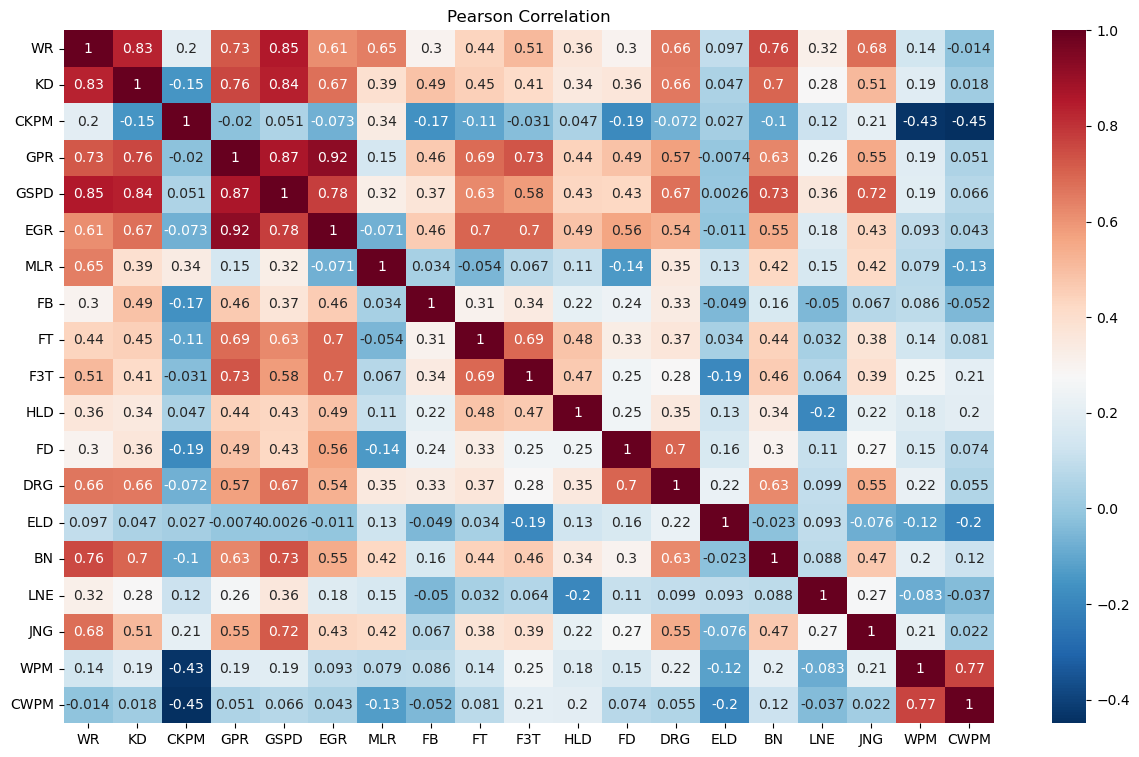

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,9))
sns.heatmap(df.iloc[:, 1:-1].corr(), annot = True, cmap = 'RdBu_r')
plt.title("Pearson Correlation")
plt.show()


In [4]:


df_encoded = pd.get_dummies(df, columns=['index'])

# 划分特征和目标变量
X = df_encoded[['WR','KD','CKPM','GPR','GSPD','EGR','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','BN','LNE','JNG','WPM','CWPM']]  
y = df_encoded['IsWin']  

# 使用随机森林分类器进行特征选择
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# 获取特征的重要性得分
feature_importances = model.feature_importances_

# 创建特征重要性数据框
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 排序特征按其重要性得分
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



feature_importance_df.head(20)

,Feature,Importance
17,WPM,0.090081
18,CWPM,0.076921
0,WR,0.071990
16,JNG,0.064214
13,ELD,0.060444
6,MLR,0.060157
2,CKPM,0.058187
11,FD,0.054279
1,KD,0.050992
8,FT,0.049350


While VIF is commonly used in the context of linear regression, it's not directly applicable to tree-based models such as Random Forests.Based on feature importance score and pearson correlation coefficient, i decide to remove these features to avoid Multicollinearity:KD,GSPD,BN,EGR,WPM，F3T.After removing these features，the correlation coefficient is:

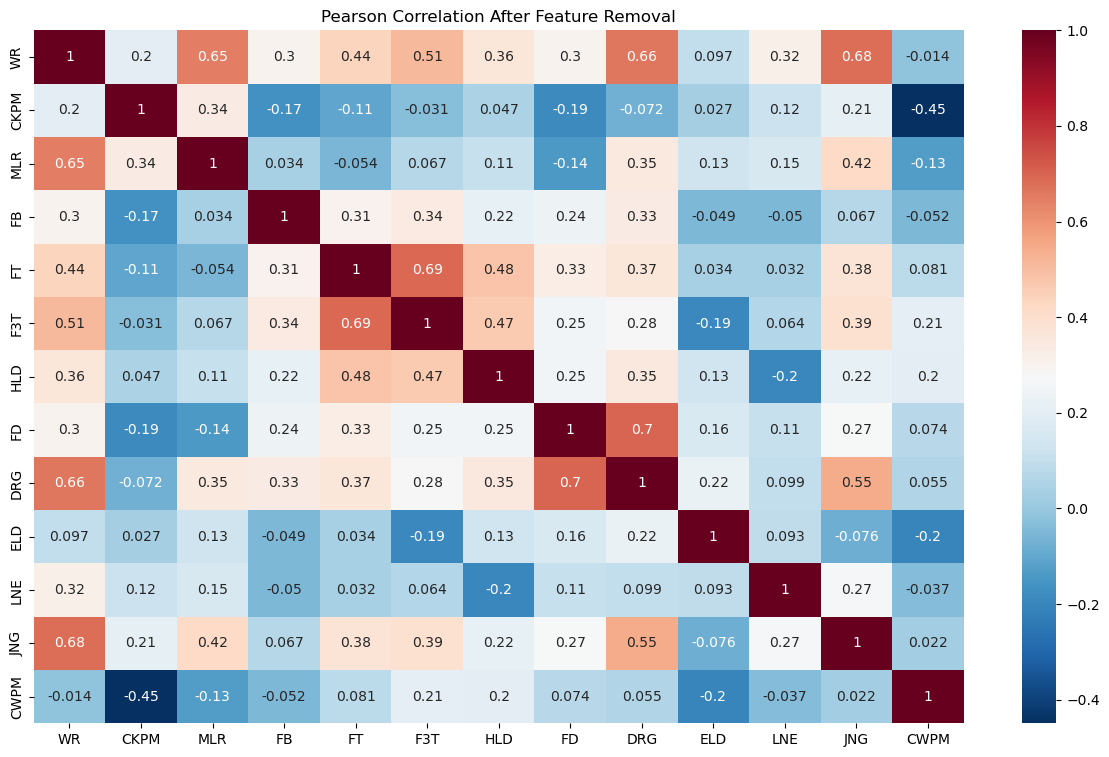

In [5]:

features_to_remove = ['KD', 'GSPD', 'BN', 'EGR', 'WPM','GPR']
df1 = df.drop(features_to_remove, axis=1)

plt.figure(figsize=(15, 9))
sns.heatmap(df1.iloc[:, 1:-1].corr(), annot=True, cmap='RdBu_r')
plt.title("Pearson Correlation After Feature Removal")
plt.show()

### Random Forest

In [6]:
df1

,index,WR,CKPM,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,LNE,JNG,CWPM,IsWin
0,T1,0.119447,-0.02,10.9,-0.01,0.05,0.03,0.02,0.05,0.03,0.25,-0.003,-0.004,0.03,1
1,Cloud9,0.196685,-0.18,15.2,0.00,-0.07,-0.03,0.12,0.10,0.06,0.00,-0.001,0.027,-0.05,1
2,Gen.G,0.030134,-0.23,-4.0,0.15,0.12,0.06,-0.05,-0.05,0.00,-0.40,0.002,0.019,-0.17,1
3,Team BDS,-0.236601,-0.05,-16.2,0.01,-0.07,-0.19,-0.03,0.05,-0.04,0.64,-0.012,-0.058,-0.17,0
4,G2 Esports,0.099203,0.35,10.4,-0.10,0.08,0.03,0.10,-0.02,-0.03,0.56,0.001,0.017,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.20,-5.7,-0.12,-0.09,-0.04,-0.05,-0.11,-0.07,-0.09,0.000,-0.024,0.12,1
364,Dplus KIA,-0.070833,-0.02,-0.1,-0.15,-0.03,-0.12,0.04,-0.11,-0.02,-0.44,0.001,0.019,0.30,0
365,Invictus Gaming,0.103757,0.38,9.5,-0.23,0.04,-0.04,-0.10,-0.11,-0.05,0.03,0.016,0.039,-0.28,1
366,Royal Never Give Up,0.177327,0.12,11.2,0.03,-0.01,0.04,-0.10,0.16,0.07,0.51,-0.001,0.000,-0.10,1


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.03, 'max_depth': 30}
Best Accuracy:  0.6342047930283224


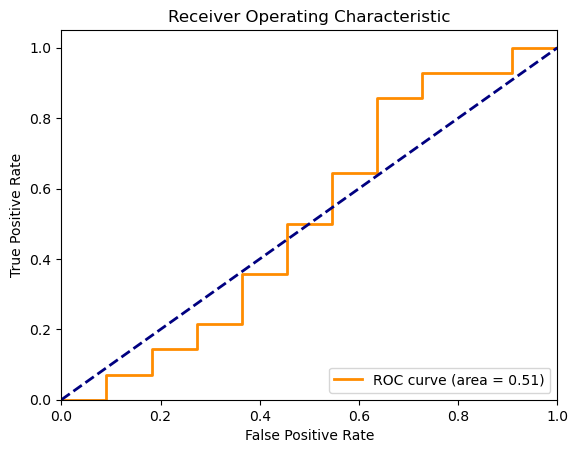

confusion matrix:
[[ 4  7]
 [ 3 11]]


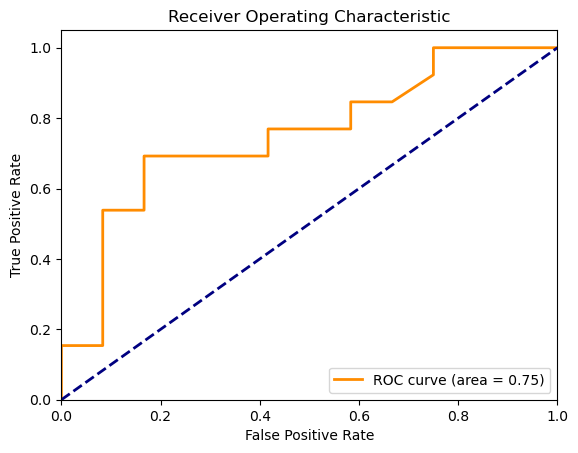

confusion matrix:
[[9 3]
 [4 9]]


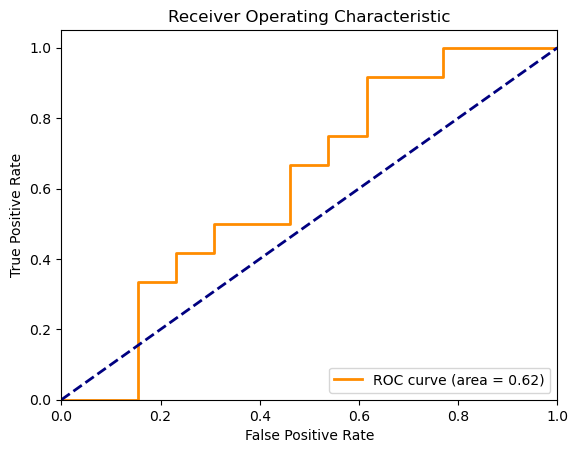

confusion matrix:
[[11  2]
 [10  2]]


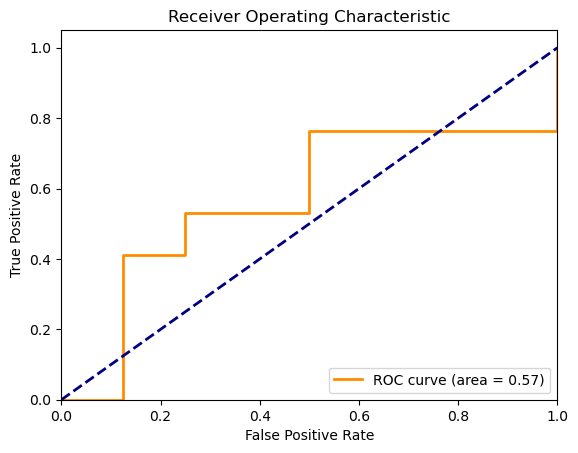

confusion matrix:
[[ 3  5]
 [ 4 13]]


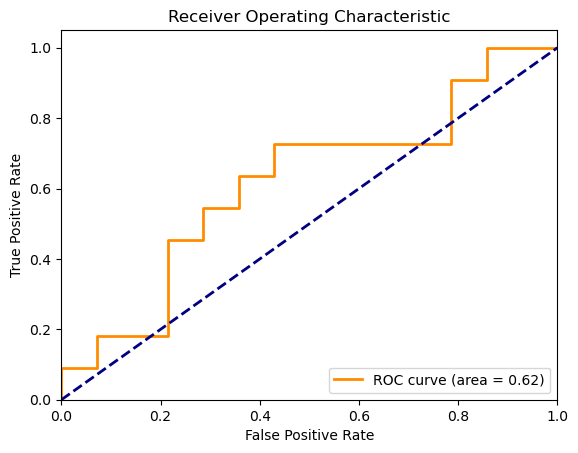

confusion matrix:
[[9 5]
 [4 7]]


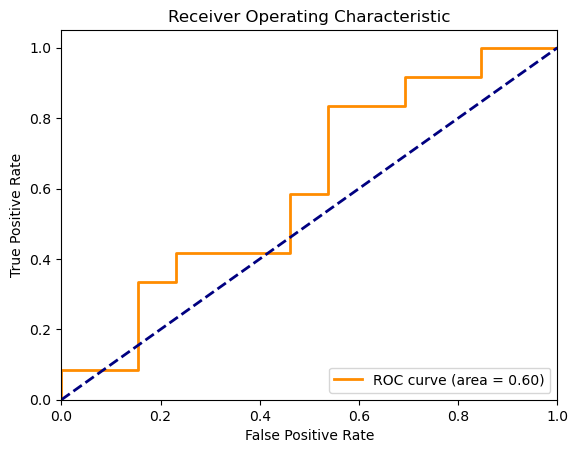

confusion matrix:
[[6 7]
 [5 7]]


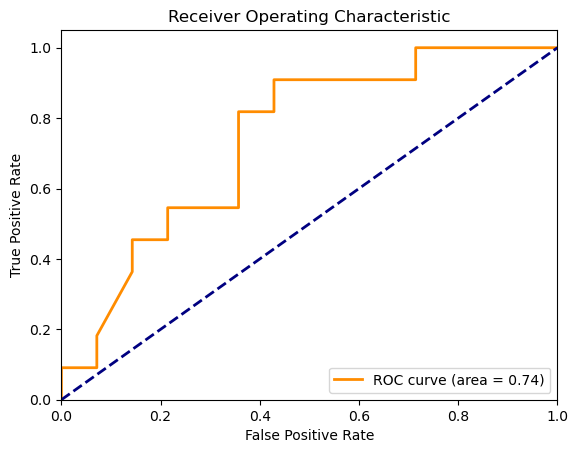

confusion matrix:
[[8 6]
 [2 9]]


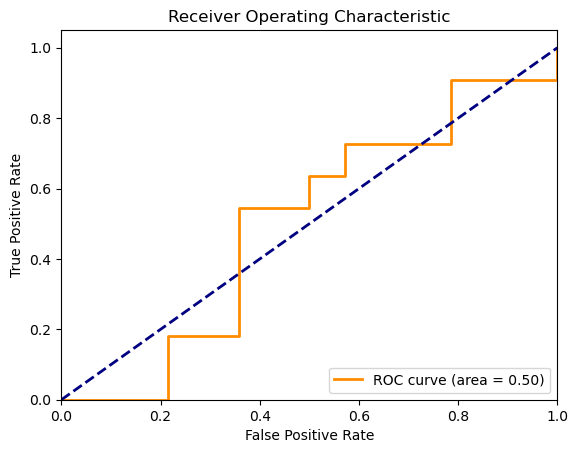

confusion matrix:
[[9 5]
 [6 5]]


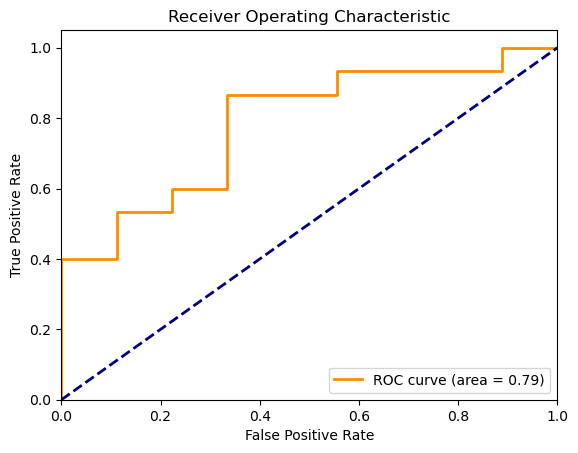

confusion matrix:
[[7 2]
 [6 9]]


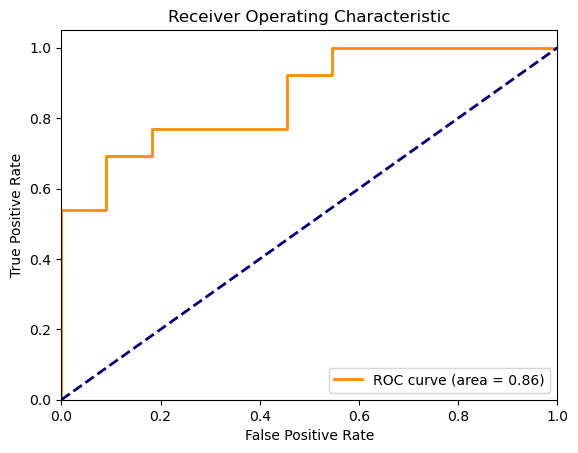

confusion matrix:
[[9 2]
 [4 9]]


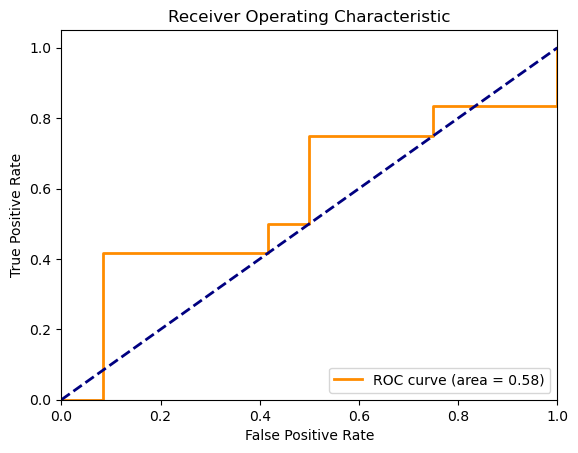

confusion matrix:
[[6 6]
 [3 9]]


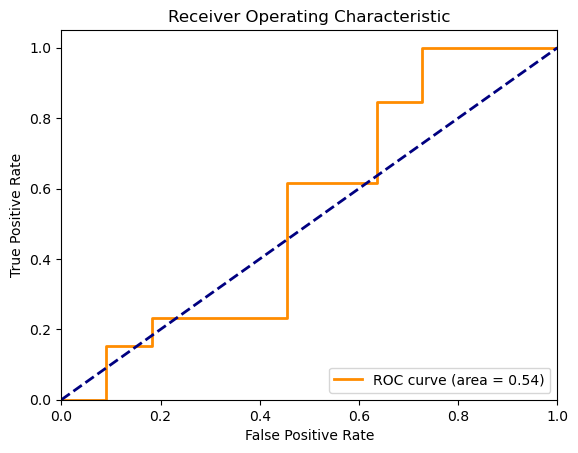

confusion matrix:
[[6 5]
 [7 6]]


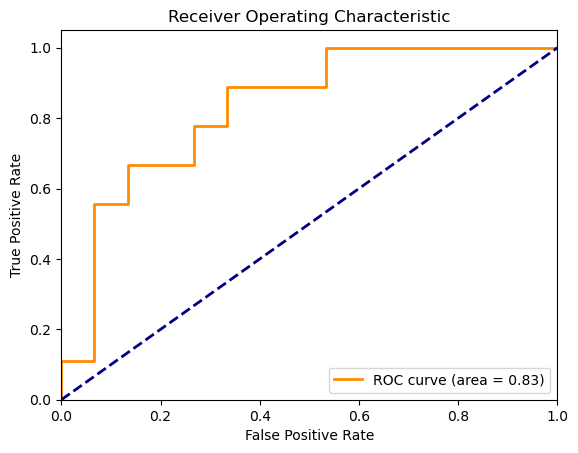

confusion matrix:
[[12  3]
 [ 3  6]]


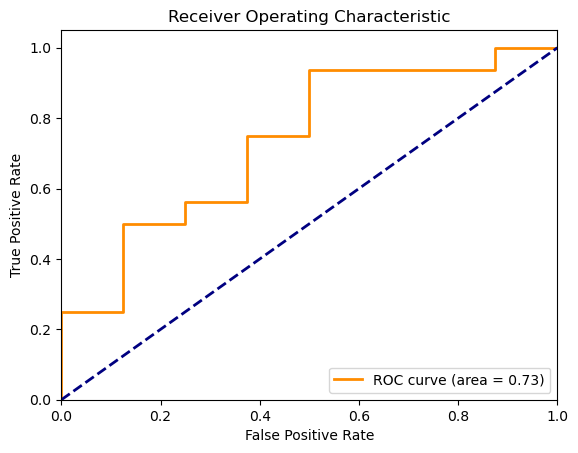

confusion matrix:
[[5 3]
 [7 9]]


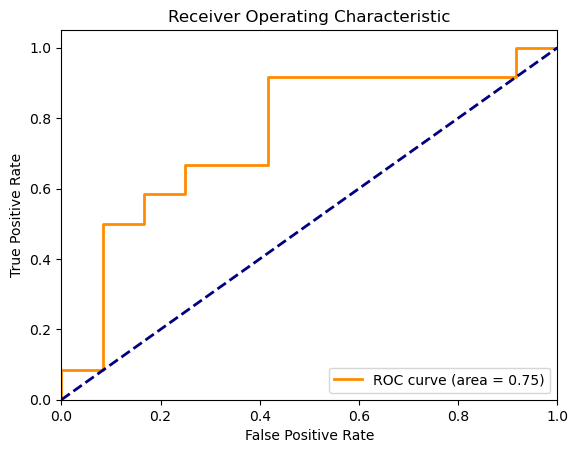

confusion matrix:
[[8 4]
 [4 8]]
accuracy: 0.6281111111111112
precision: 0.6421212121212121
recall: 0.6200998837763544
F1: 0.6200784891437066
AUC: 0.665442685945137


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
X = df1[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','CWPM']]
Y = df1['IsWin']

kf = KFold(n_splits=15, shuffle=True, random_state=42)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


rf_classifier = RandomForestClassifier(random_state=1,
    class_weight='balanced')
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_impurity_decrease': np.arange(0.0, 0.4, 0.01)  
}
scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring=scorer, cv=kf, n_iter=10, random_state=42)
random_search.fit(X_train, Y_train)
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

rf_classifier = random_search.best_estimator_

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    rf_classifier.fit(X_train, Y_train)
    Y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    custom_threshold = 0.5
    Y_pred = (Y_prob >= custom_threshold).astype(int)
    accuracy_list.append(accuracy_score(Y_test, Y_pred))
    precision_list.append(precision_score(Y_test, Y_pred))
    recall_list.append(recall_score(Y_test, Y_pred))
    f1_list.append(f1_score(Y_test, Y_pred))
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)  
    roc_auc_list.append(roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("confusion matrix:")
    print(conf_matrix)

print("accuracy:", sum(accuracy_list) / len(accuracy_list))
print("precision:", sum(precision_list) / len(precision_list))
print("recall:", sum(recall_list) / len(recall_list))
print("F1:", sum(f1_list) / len(f1_list))
print("AUC:", sum(roc_auc_list) / len(roc_auc_list))





## Predict the Winner
According to the tournament system, we start with the 8-in-4 prediction, the Top 8 Bo5 (five games to three wins) matches of the 2023 Worlds will be Gen.G vs BLG, NRG vs WBG, the two winners of the four teams will play in the semi-finals, with the winners advancing to the finals; meanwhile, the two winners of JDG vs KT and LNG vs T1 will play in the semi-finals, with the winners advancing to the finals.

Since the loser of the previous game chooses either the blue or the red side for the next game, and according to the baseline model the blue side has a higher win rate than the red side, we assume that the team that loses in the previous game will choose the blue side in the next game, so we need to consider the case where the teams in the game are on both sides of the table.

# 8-in-4

In [42]:
year2023StatForWorldsTeam = pd.read_excel(r'year2023StatForWorldsTeam.xlsx') 
year2023StatForWorldsTeam.set_index("team", inplace = True)
year2023StatForWorldsTeam.rename(columns={"win rate": "WR"}, inplace=True)

selected_columns = year2023StatForWorldsTeam[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','CWPM']]
selected_columns

,WR,CKPM,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,LNE,JNG,CWPM
team,,,,,,,,,,,,,
Gen.G,0.726562,0.75,11.9,0.61,0.66,0.64,0.53,0.44,0.59,0.60,0.509,0.550,1.21
T1,0.611511,0.77,1.4,0.51,0.72,0.71,0.61,0.61,0.58,0.50,0.504,0.514,1.40
KT Rolster,0.694215,0.69,11.9,0.55,0.61,0.64,0.45,0.55,0.60,0.73,0.506,0.505,1.37
Dplus KIA,0.606061,0.67,0.1,0.58,0.53,0.54,0.54,0.62,0.62,0.44,0.499,0.522,1.52
JD Gaming,0.777778,0.86,21.5,0.52,0.55,0.65,0.43,0.50,0.60,0.00,0.511,0.553,1.25
Bilibili Gaming,0.641379,0.91,6.9,0.57,0.52,0.76,0.48,0.59,0.56,0.00,0.502,0.531,1.32
LNG Esports,0.651786,0.81,-1.4,0.61,0.40,0.60,0.60,0.60,0.54,0.00,0.504,0.505,1.34
Weibo Gaming,0.607843,0.82,-18.9,0.45,0.67,0.67,0.50,0.67,0.51,0.00,0.506,0.520,1.39
G2 Esports,0.705263,1.02,10.5,0.48,0.61,0.57,0.64,0.60,0.59,1.00,0.500,0.539,0.95


In [43]:
# GenG in Blue
GenG_vs_BLG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["Bilibili Gaming"]].squeeze())
# BlG in Blue
BLG_vs_GenG = selected_columns.loc[["Bilibili Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())

# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_BLG)
BLG_WR = rf_classifier.predict(BLG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR, '; the Winning Rate for BLG in the blue side is ', BLG_WR)

The Winning Rate for Gen.G in the blue side is  [1] ; the Winning Rate for BLG in the blue side is  [0]


GenG win

In [35]:
# NRG in Blue
NRG_vs_WBG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())
# WBG in Blue
WBG_vs_NRG = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = rf_classifier.predict(NRG_vs_WBG)
WBG_WR = rf_classifier.predict(WBG_vs_NRG)


print('The Winning Rate for NRG in the blue side is ', NRG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)

The Winning Rate for NRG in the blue side is  [0] ; the Winning Rate for WBG in the blue side is  [1]


WBG win


In [36]:
# JDG in Blue
JDG_vs_KT = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["KT Rolster"]].squeeze())
# KT in Blue
KT_vs_JDG = selected_columns.loc[["KT Rolster"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())

# Predict the Winning Rate
JDG_WR = rf_classifier.predict(JDG_vs_KT)
KT_WR = rf_classifier.predict(KT_vs_JDG)

print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for KT in the blue side is ', KT_WR)

The Winning Rate for JDG in the blue side is  [1] ; the Winning Rate for KT in the blue side is  [0]


JDG win

In [45]:
# LNG in Blue
LNG_vs_T1 = selected_columns.loc[["LNG Esports"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_LNG = selected_columns.loc[["T1"]].sub(selected_columns.loc[["LNG Esports"]].squeeze())

# Predict the Winning Rate
LNG_WR = rf_classifier.predict_proba(LNG_vs_T1)
T1_WR = rf_classifier.predict_proba(T1_vs_LNG)
print('The Winning Rate for LNG in the blue side is ', LNG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for LNG in the blue side is  [[0.51877299 0.48122701]] ; the Winning Rate for T1 in the blue side is  [[0.51561607 0.48438393]]


T1 win

# semifinals¶

In [38]:
# GenG in Blue
GenG_vs_WBG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())
# WBG in Blue
WBG_vs_GenG = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())
# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_WBG)
WBG_WR = rf_classifier.predict(WBG_vs_GenG)
print('The Winning Rate for GenG in the blue side is ', GenG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)


The Winning Rate for GenG in the blue side is  [1] ; the Winning Rate for WBG in the blue side is  [0]



GenG win

In [47]:
# JDG in Blue
JDG_vs_T1 = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1in Blue
T1_vs_JDG = selected_columns.loc[["T1"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())
# Predict the Winning Rate
JDG_WR = rf_classifier.predict(JDG_vs_T1)
T1_WR = rf_classifier.predict(T1_vs_JDG)
print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for JDG in the blue side is  [1] ; the Winning Rate for T1 in the blue side is  [0]


JDG win



## Final

In [40]:
# GenG  in Blue
GenG_vs_JDG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())
# JDG in Blue
JDG_vs_GenG  = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())
# Predict the Winning Rate
GenG_WR = rf_classifier.predict(GenG_vs_JDG)
JDG_WR = rf_classifier.predict(JDG_vs_GenG )
print('The Winning Rate for GenG  in the blue side is ', GenG_WR, '; the Winning Rate for JDG in the blue side is ', JDG_WR)

The Winning Rate for GenG  in the blue side is  [0] ; the Winning Rate for JDG in the blue side is  [1]


By using Random Forest Model, The winner is JD Gaming


___
### 2023 Season World Championship:
#### T1 3:0 WBG 
Game 1: WBG 0 T1 1    
Game 2: WBG 0 T1 1    
Game 3: WBG 0 T1 1

In [48]:
# WBG in Blue vs T1 in red
WBG_vs_T1_Final = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1 in Blue vs WBG in red
T1_vs_WBG_Final = selected_columns.loc[["T1"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())

# Predict the Winning Rate
WBG_WR_final = rf_classifier.predict(WBG_vs_T1_Final)
T1_WR_final = rf_classifier.predict(T1_vs_WBG_Final)
print('The Winning Rate for WBG in the blue side is ', WBG_WR_final, '; the Winning Rate for T1 in the blue side is ', T1_WR_final)

The Winning Rate for WBG in the blue side is  [0] ; the Winning Rate for T1 in the blue side is  [1]


From the above report we can see that the model suggests that WBG cannot win when they play T1 both on the blue side and on the red side, which matches the condition that T1 3:0 WBG.